# Brain Tumor Classification Task
Alessio Carnevale, Manuel Cattoni, Carlo Schillaci

Dataset link: [Kaggle](https://www.kaggle.com/datasets/pkdarabi/brain-tumor-image-dataset-semantic-segmentation/data)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import skimage

from functions import display_images_by_category, display_image_with_annotations, display_images_with_coco_annotations, visualize_annotation_mask, create_mask, sample_annotation_mask_pixels, extract_patches
from skimage import io
import os


import kagglehub
import random

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

/Users/carlo/Desktop/suspi_appunti/programming_folders/CompVision/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Download latest version
path = kagglehub.dataset_download("pkdarabi/brain-tumor-image-dataset-semantic-segmentation")

print("Path to dataset files:", path)

Path to dataset files: /Users/carlo/.cache/kagglehub/datasets/pkdarabi/brain-tumor-image-dataset-semantic-segmentation/versions/1


In [3]:
# Load the annotations file
with open('Dataset/train/_annotations.coco.json', 'r') as file:
    annotations = json.load(file)

# Print the JSON content in a readable format
print(json.dumps(annotations, indent=4))

{
    "info": {
        "year": "2023",
        "version": "1",
        "description": "Exported from roboflow.com",
        "contributor": "",
        "url": "https://public.roboflow.com/object-detection/undefined",
        "date_created": "2023-08-19T04:37:54+00:00"
    },
    "licenses": [
        {
            "id": 1,
            "url": "https://creativecommons.org/licenses/by/4.0/",
            "name": "CC BY 4.0"
        }
    ],
    "categories": [
        {
            "id": 0,
            "name": "Tumor",
            "supercategory": "none"
        },
        {
            "id": 1,
            "name": "0",
            "supercategory": "Tumor"
        },
        {
            "id": 2,
            "name": "1",
            "supercategory": "Tumor"
        }
    ],
    "images": [
        {
            "id": 0,
            "license": 1,
            "file_name": "2256_jpg.rf.3afd7903eaf3f3c5aa8da4bbb928bc19.jpg",
            "height": 640,
            "width": 640,
            "da

In [4]:
with open('Dataset/train/_annotations.coco.json','r') as file:
    train = json.load(file)

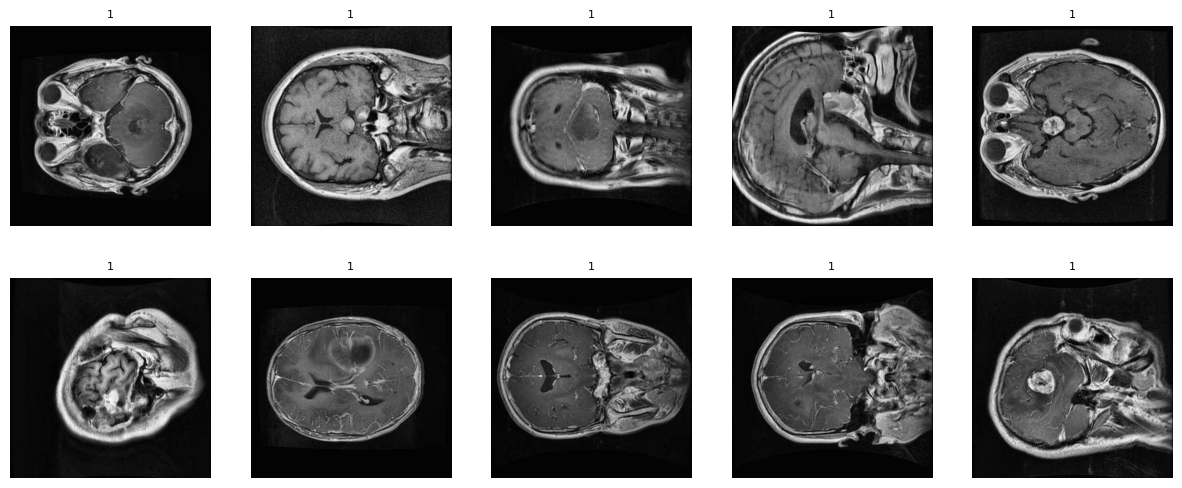

In [5]:
random_images = random.sample(train['images'], 10)

plt.figure(figsize=(15, 6))

for i, img_info in enumerate(random_images):
    img_path = os.path.join('Dataset/train', img_info['file_name'])
    
    img = io.imread(img_path)

    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.title(img_info['license'], fontsize=8)
    plt.axis('off')

plt.show()

JSON description for 1432_jpg.rf.6956254b4d9b248e46e7b3d2d2b7284c.jpg:
{'id': 1152, 'license': 1, 'file_name': '1432_jpg.rf.6956254b4d9b248e46e7b3d2d2b7284c.jpg', 'height': 640, 'width': 640, 'date_captured': '2023-08-19T04:37:54+00:00'}
JSON description for 1449_jpg.rf.6a63b878669df449f30382c0e84ae05f.jpg:
{'id': 1166, 'license': 1, 'file_name': '1449_jpg.rf.6a63b878669df449f30382c0e84ae05f.jpg', 'height': 640, 'width': 640, 'date_captured': '2023-08-19T04:37:54+00:00'}
JSON description for 2194_jpg.rf.84a2a1023ecaa51be1c28b230fe241c6.jpg:
{'id': 1308, 'license': 1, 'file_name': '2194_jpg.rf.84a2a1023ecaa51be1c28b230fe241c6.jpg', 'height': 640, 'width': 640, 'date_captured': '2023-08-19T04:37:54+00:00'}
JSON description for 1622_jpg.rf.bf4ac68009371fde1a122e4df65d590a.jpg:
{'id': 785, 'license': 1, 'file_name': '1622_jpg.rf.bf4ac68009371fde1a122e4df65d590a.jpg', 'height': 640, 'width': 640, 'date_captured': '2023-08-19T04:37:54+00:00'}
JSON description for 1272_jpg.rf.eb656e0342298efd

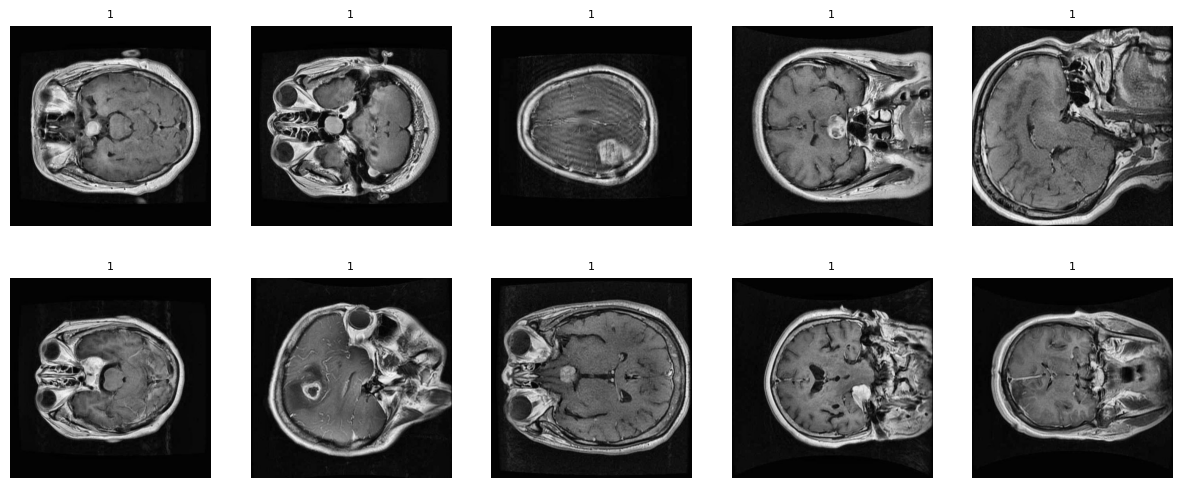

In [6]:
random_images = random.sample(train['images'], 10)

plt.figure(figsize=(15, 6))

for i, img_info in enumerate(random_images):
    img_path = os.path.join('Dataset/train', img_info['file_name'])
    
    img = io.imread(img_path)

    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.title(img_info['license'], fontsize=8)
    plt.axis('off')

    # Print the full JSON description for the image
    print(f"JSON description for {img_info['file_name']}:")
    print(img_info)

plt.show()

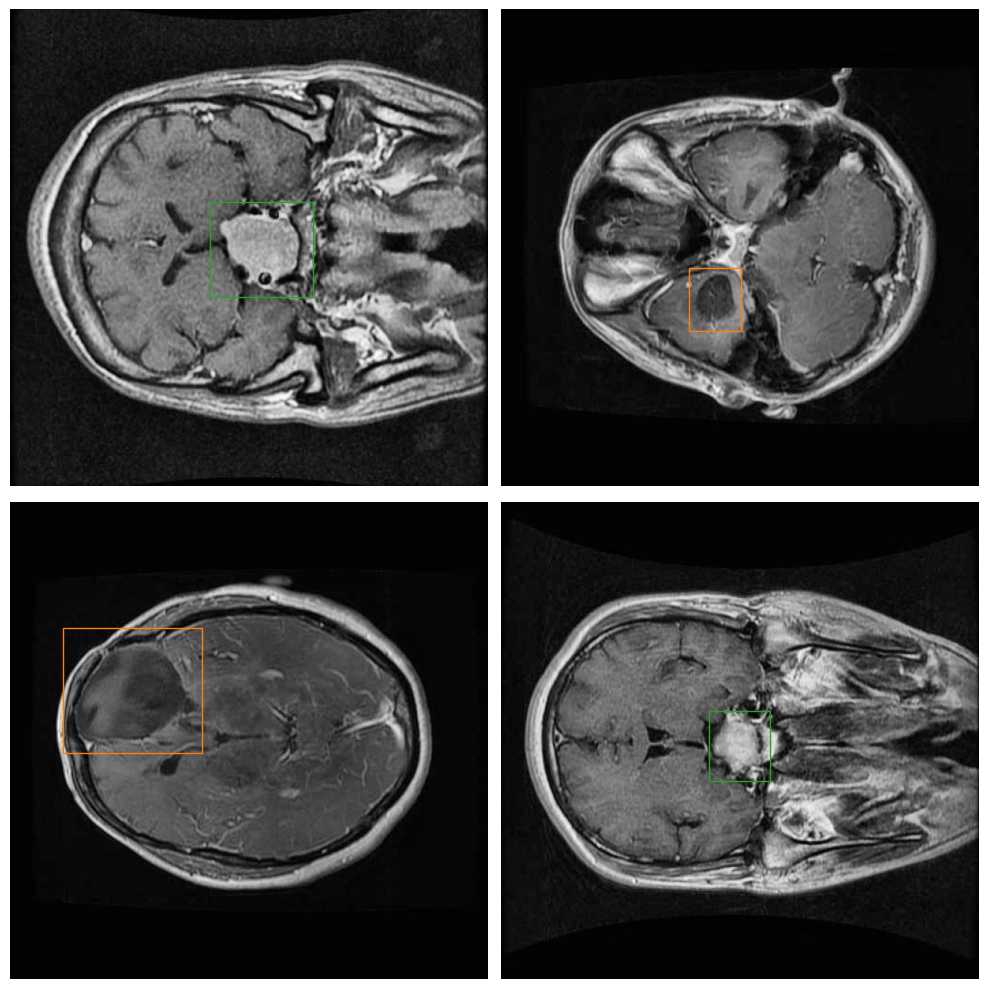

In [7]:
all_image_files = [os.path.join('Dataset/train', img['file_name']) for img in train['images']]
random_image_files = random.sample(all_image_files, 4)

# Choose between 'bbox', 'seg', or 'both'
display_type = 'seg'
display_images_with_coco_annotations(random_image_files, train, display_type)

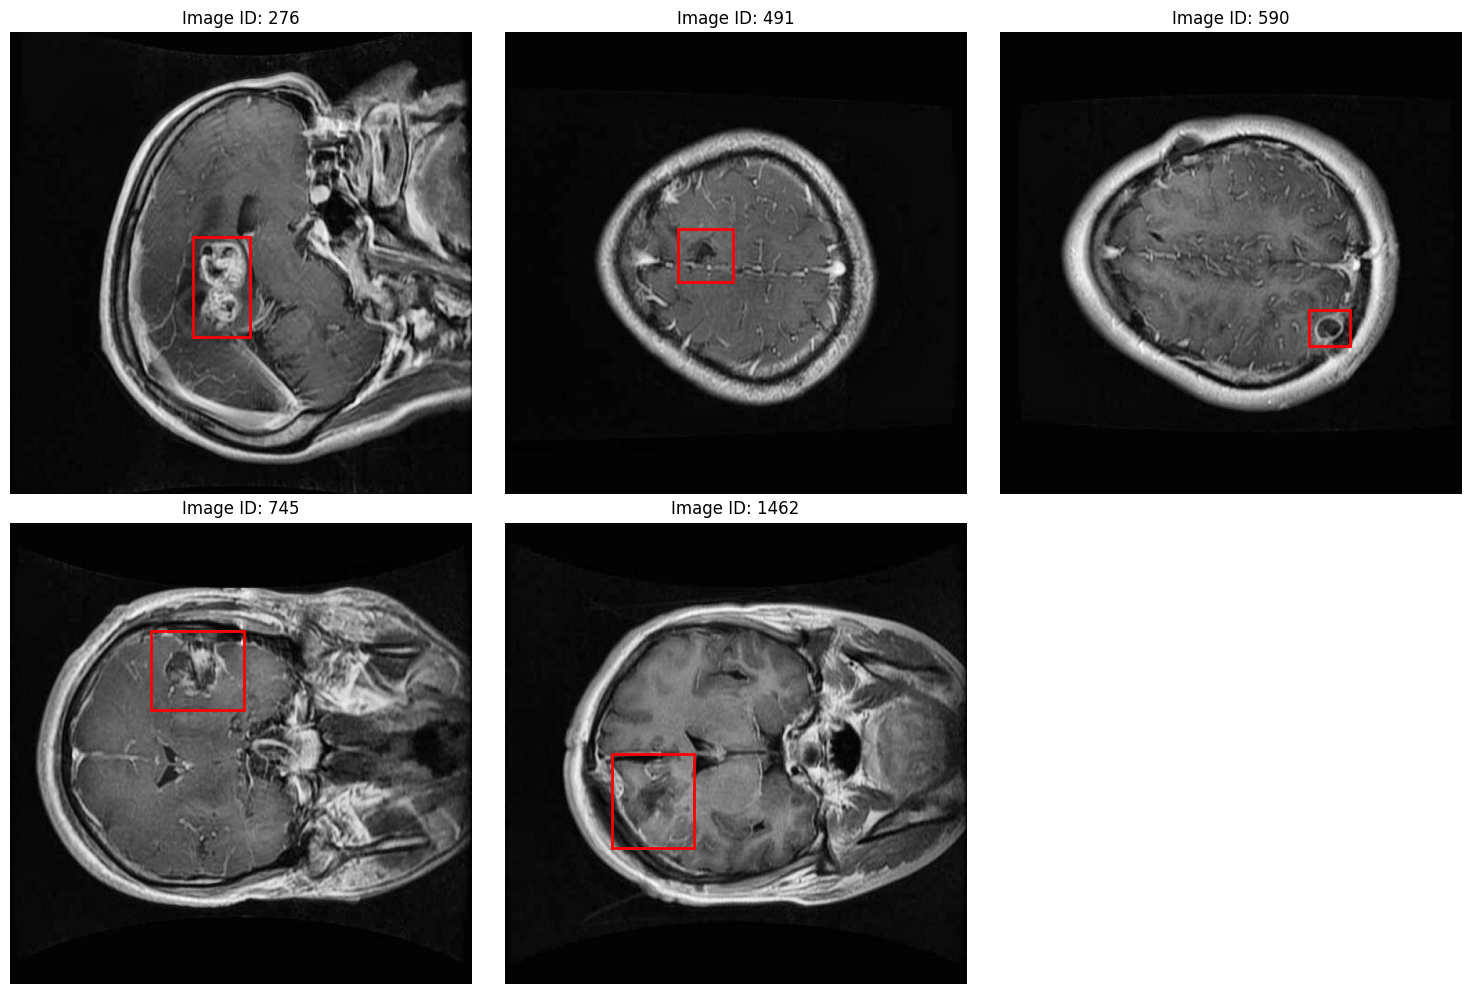

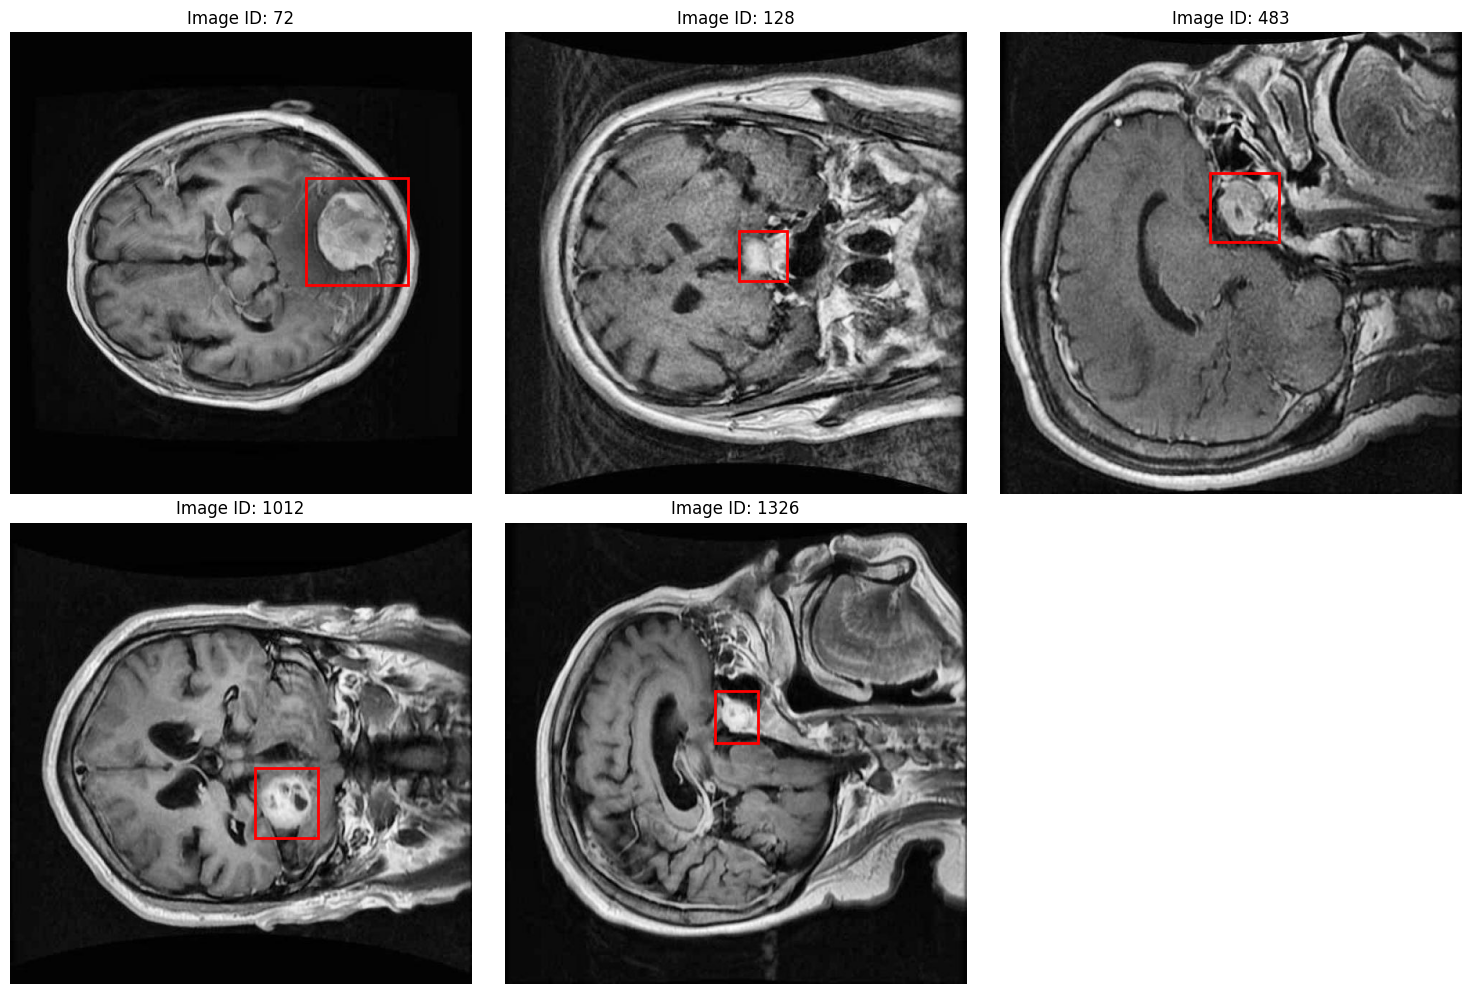

In [8]:
# Display 5 random images for category_id = 1
display_images_by_category(train, category_id=1, num_images=5)

# Display 5 random images for category_id = 2
display_images_by_category(train, category_id=2, num_images=5)

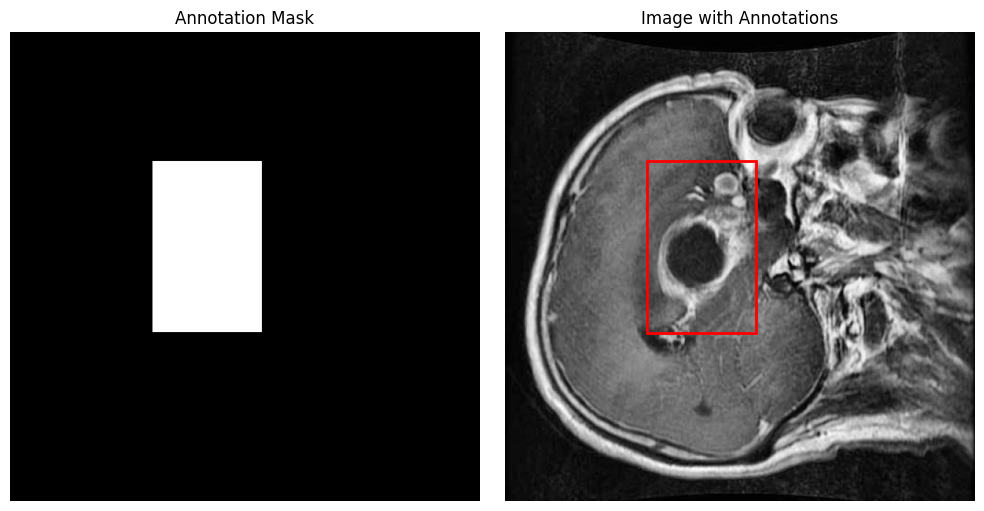

In [9]:
# Example usage
visualize_annotation_mask(train, image_id=1, show_annotations=True)

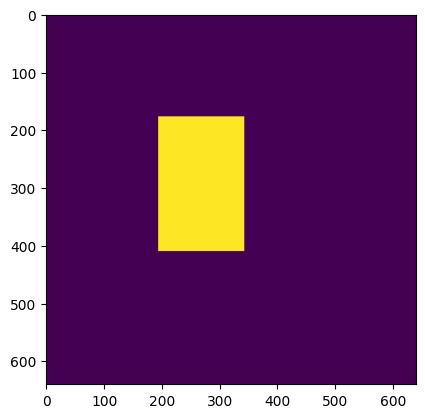

In [10]:
test_mask = create_mask(train, image_id=1)
plt.imshow(test_mask)

In [11]:
image_id = 1
# mask = create_mask(train, image_id=1)

# samples = sample_annotation_mask_pixels(
#     mask, num_true=3, num_false=3, random_state=42
# )

# plt.figure(figsize=(6, 6))
# plt.imshow(mask, cmap='gray')
# plt.scatter(
#     [coord[1] for coord in samples["true"]],
#     [coord[0] for coord in samples["true"]],
#     marker='o',
#     color='lime',
#     label='true pixels',
#     s=60,
# )
# plt.scatter(
#     [coord[1] for coord in samples["false"]],
#     [coord[0] for coord in samples["false"]],
#     marker='x',
#     color='red',
#     label='false pixels',
#     s=60,
# )
# plt.legend()
# plt.title(f"Sampled pixels for image_id={image_id}")
# plt.axis('off')
# plt.show()

# print("True pixels:", samples["true"])
# print("False pixels:", samples["false"])

In [12]:
patches_total = []
labels_total = []

for img_id in range(len(train['images'][:20])):
    print(img_id)
    patches, labels = extract_patches(annotations, image_id)
    patches_total.extend(patches_total)
    labels_total.extend(labels)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [13]:
patches_test, labels_test = extract_patches(annotations, image_id)

In [14]:
# # Dividi tumor / non-tumor
# tumor_patches = [patch for patch, label in zip(patches_test, labels_test)
#                  if isinstance(patch, np.ndarray) and patch.size > 0 and label == 255]
# non_tumor_patches = [patch for patch, label in zip(patches_test, labels_test)
#                      if isinstance(patch, np.ndarray) and patch.size > 0 and label != 255]

# print("Num tumor patches valid:", len(tumor_patches))
# print("Num non-tumor patches valid:", len(non_tumor_patches))

# # Numero di patch da visualizzare (max 10, ma non più di quante ne hai)
# k_tumor = min(10, len(tumor_patches))
# k_non_tumor = min(10, len(non_tumor_patches))

# # Se non hai abbastanza patch, evita errori
# if k_tumor == 0 or k_non_tumor == 0:
#     print("Non ci sono abbastanza patch valide per plottare.")
# else:
#     random_tumor_patches = random.sample(tumor_patches, k_tumor)
#     random_non_tumor_patches = random.sample(non_tumor_patches, k_non_tumor)

#     plt.figure(figsize=(15, 10))

#     # Plot tumor patches
#     for i, patch in enumerate(random_tumor_patches):
#         plt.subplot(4, 5, i + 1)
#         plt.imshow(patch, cmap="gray")
#         plt.title("Tumor")
#         plt.axis('off')

#     # Plot non-tumor patches
#     for i, patch in enumerate(random_non_tumor_patches):
#         plt.subplot(4, 5, i + 11)
#         plt.imshow(patch, cmap="gray")
#         plt.title("Non-Tumor")
#         plt.axis('off')

#     plt.tight_layout()
#     plt.show()


In [15]:
# # Crea dataset di patches da tutte le immagini del train set
# patches_total = []
# labels_total = []

# for img_info in train['images']:
#     img_id = img_info['id']
#     print(f"Processing image {img_id}...")
    
#     try:
#         patches, labels = extract_patches(train, img_id)
#         patches_total.extend(patches)
#         labels_total.extend(labels)
#     except Exception as e:
#         print(f"Error processing image {img_id}: {e}")
#         continue

# print(f"\nTotal patches extracted: {len(patches_total)}")
# print(f"Total labels: {len(labels_total)}")

In [16]:
# Separa patches tumor e non-tumor
tumor_patches = [patch for patch, label in zip(patches_total, labels_total) 
                 if isinstance(patch, np.ndarray) and patch.size > 0 and label == 255]
non_tumor_patches = [patch for patch, label in zip(patches_total, labels_total) 
                     if isinstance(patch, np.ndarray) and patch.size > 0 and label != 255]

print(f"Tumor patches: {len(tumor_patches)}")
print(f"Non-tumor patches: {len(non_tumor_patches)}")

# Seleziona 10 patches random da ciascuna categoria
k_tumor = min(10, len(tumor_patches))
k_non_tumor = min(10, len(non_tumor_patches))

if k_tumor > 0 and k_non_tumor > 0:
    random_tumor_patches = random.sample(tumor_patches, k_tumor)
    random_non_tumor_patches = random.sample(non_tumor_patches, k_non_tumor)

    # Visualizza le patches
    plt.figure(figsize=(15, 10))

    # Plot tumor patches
    for i, patch in enumerate(random_tumor_patches):
        plt.subplot(4, 5, i + 1)
        plt.imshow(patch, cmap="gray")
        plt.title("Tumor", fontsize=10)
        plt.axis('off')

    # Plot non-tumor patches
    for i, patch in enumerate(random_non_tumor_patches):
        plt.subplot(4, 5, i + 11)
        plt.imshow(patch, cmap="gray")
        plt.title("Non-Tumor", fontsize=10)
        plt.axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("Non ci sono abbastanza patches valide per la visualizzazione.")

Tumor patches: 0
Non-tumor patches: 0
Non ci sono abbastanza patches valide per la visualizzazione.


since a lot of non tumors have black background, we filter them based on the mean and std.dev. intensity

In [17]:
# Filtra patches non informative (troppo scure)
def is_informative(patch):
    return patch.mean() > 30 and patch.std() > 15

filtered_tumor = [p for p in tumor_patches if is_informative(p)]
filtered_non_tumor = [p for p in non_tumor_patches if is_informative(p)]

In [18]:
# Seleziona 10 patches random da ciascuna categoria
k_tumor = min(10, len(filtered_tumor))
k_non_tumor = min(10, len(filtered_non_tumor))

if k_tumor > 0 and k_non_tumor > 0:
    random_tumor_patches = random.sample(filtered_tumor, k_tumor)
    random_non_tumor_patches = random.sample(filtered_non_tumor, k_non_tumor)

    # Visualizza le patches
    plt.figure(figsize=(15, 10))

    # Plot tumor patches
    for i, patch in enumerate(random_tumor_patches):
        plt.subplot(4, 5, i + 1)
        plt.imshow(patch, cmap="gray")
        plt.title("Tumor", fontsize=10)
        plt.axis('off')

    # Plot non-tumor patches
    for i, patch in enumerate(random_non_tumor_patches):
        plt.subplot(4, 5, i + 11)
        plt.imshow(patch, cmap="gray")
        plt.title("Non-Tumor", fontsize=10)
        plt.axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("Non ci sono abbastanza patches valide per la visualizzazione.")

Non ci sono abbastanza patches valide per la visualizzazione.


# Build Training Dataset 

In [19]:
# X_train = filtered_tumor + filtered_non_tumor
# y_train = [1] * len(filtered_tumor) + [0] * len(filtered_non_tumor)

In [20]:
# np.savez_compressed('patches_train.npz',
#                     X_train=np.array(X_train),
#                     y_train=np.array(y_train))

In [21]:
data = np.load('patches_train.npz')
X_train = data['X_train']
y_train = data['y_train']

In [30]:
X_train_norm = X_train.astype('float32') / 255.0

# Train a classifier 

In [31]:
from sklearn.linear_model import LogisticRegression

# Flatten patches for logistic regression
X_train_flat = np.array([p.flatten() for p in X_train_norm])
y_train = np.array(y_train)

# Train
logistic = LogisticRegression(max_iter=1000)
logistic.fit(X_train_flat, y_train)

LogisticRegression(max_iter=1000)

# Evaluate on validation patches

In [23]:
with open('Dataset/test/_annotations.coco.json','r') as file:
    test = json.load(file)


In [24]:
with open('Dataset/valid/_annotations.coco.json','r') as file:
    valid = json.load(file)

patches_valid, labels_valid = extract_patches(annotations, image_id)

In [25]:
# # Crea dataset di patches da tutte le immagini del train set
# valid_patches = []
# valid_labels = []

# for img_info in valid['images']:
#     img_id = img_info['id']
#     print(f"Processing image {img_id}...")
    
#     try:
#         patches, labels = extract_patches(train, img_id)
#         valid_patches.extend(patches)
#         valid_labels.extend(labels)
#     except Exception as e:
#         print(f"Error processing image {img_id}: {e}")
#         continue

# print(f"\nTotal patches extracted: {len(valid_patches)}")
# print(f"Total labels: {len(valid_labels)}")

# valid_tumor_patches = [patch for patch, label in zip(valid_patches, valid_labels) 
#                  if isinstance(patch, np.ndarray) and patch.size > 0 and label == 255]
# valid_non_tumor_patches = [patch for patch, label in zip(valid_patches, valid_labels) 
#                      if isinstance(patch, np.ndarray) and patch.size > 0 and label != 255]


In [26]:
# X_valid = valid_tumor_patches + valid_non_tumor_patches
# y_valid = [1] * len(valid_tumor_patches) + [0] * len(valid_non_tumor_patches)


# X_valid_flat = np.array([p.flatten() for p in X_valid])
# y_valid = np.array(y_valid) # Assicurati che anche le label siano un array numpy


# np.savez_compressed('patch_valid.npz',
#                     X_valid=np.array(X_valid),
#                     y_valid=np.array(y_valid))

In [27]:
data = np.load('patch_valid.npz')
X_valid = data['X_valid']
y_valid = data['y_valid']

In [32]:
X_valid_norm = X_valid.astype('float32') / 255.0

Accuracy: 0.5844
------------------------------
Classification Report:
              precision    recall  f1-score   support

   Non-Tumor       0.61      0.57      0.59       429
       Tumor       0.56      0.60      0.58       389

    accuracy                           0.58       818
   macro avg       0.58      0.58      0.58       818
weighted avg       0.59      0.58      0.58       818



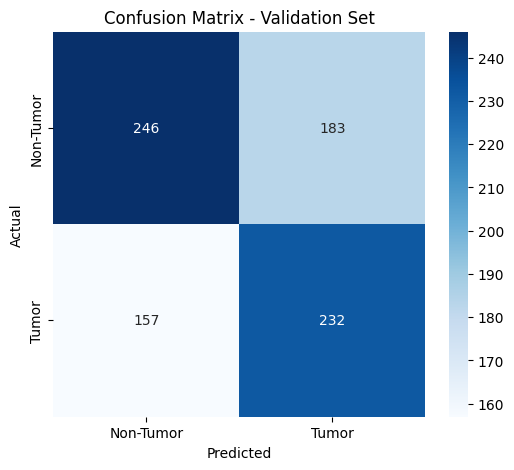

In [33]:
# 2. Fai la predizione usando il modello addestrato

X_valid_flat = np.array([p.flatten() for p in X_valid_norm])

y_pred = logistic.predict(X_valid_flat)

# 3. Calcola e stampa le metriche
acc = accuracy_score(y_valid, y_pred)
print(f"Accuracy: {acc:.4f}")
print("-" * 30)
print("Classification Report:")
print(classification_report(y_valid, y_pred, target_names=['Non-Tumor', 'Tumor']))

# 4. Visualizza la Matrice di Confusione (Opzionale ma molto utile)
cm = confusion_matrix(y_valid, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Non-Tumor', 'Tumor'], 
            yticklabels=['Non-Tumor', 'Tumor'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Validation Set')
plt.show()


## CNN

In [39]:
# Build a CNN using Keras
from tensorflow import keras

# Build the CNN model
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=X_train[0].shape),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


# Train the model
history = model.fit(
    X_train_norm, y_train,
    validation_data=(X_valid_norm, y_valid),
    epochs=10,
    batch_size=32
)

# Evaluate the model
val_loss, val_accuracy = model.evaluate(X_valid_norm, y_valid, verbose=0)

print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")

Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 74ms/step - accuracy: 0.6702 - loss: 0.7155 - val_accuracy: 0.4829 - val_loss: 0.8750
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - accuracy: 0.7575 - loss: 0.5178 - val_accuracy: 0.4670 - val_loss: 0.8302
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.7803 - loss: 0.4739 - val_accuracy: 0.4780 - val_loss: 1.2192
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - accuracy: 0.7954 - loss: 0.4338 - val_accuracy: 0.6076 - val_loss: 1.2639
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.8161 - loss: 0.3989 - val_accuracy: 0.6406 - val_loss: 0.8887
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.8178 - loss: 0.3903 - val_accuracy: 0.6271 - val_loss: 0.8658
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - accuracy: 0.8448 - loss: 0.3604 - val_accuracy: 0.6932 - val_loss: 1.0780
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.8351 - loss: 0.3506 - val_accuracy: 0.7066 - v